In [88]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from __future__ import print_function
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
%matplotlib inline

In [5]:
mnist = fetch_mldata('MNIST Original')

In [81]:
data = mnist.data
target = mnist.target
print(target.shape, data.shape)

(70000,) (70000, 784)


[8463] [ 1.]


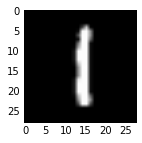

In [87]:
ind = np.random.randint(0,70000,1)
test = mnist.data[ind,:]
print(ind, mnist.target[ind])
test = test.reshape([28,28])
plt.figure(figsize=[2,2])
plt.imshow(test, cmap='gray')

In [110]:
pca = PCA()
pca.fit(data)

PCA(copy=True, n_components=None, whiten=False)

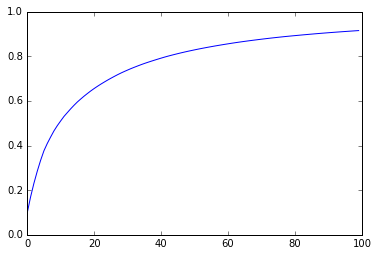

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [111]:
X = pca.transform(data)
X.shape

(70000, 784)

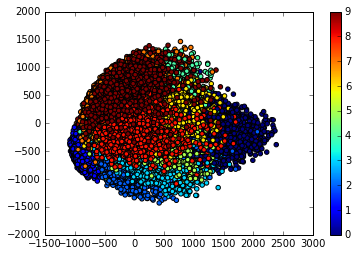

In [134]:
digit_0 = X[np.argwhere(target==2), 0:2]
digit_0 = digit_0.squeeze(axis=1)

digit_1 = X[np.argwhere(target==1), 0:2]
digit_1 = digit_1.squeeze(axis=1)

plt.scatter(X[:,0],X[:,1], c=target)
plt.colorbar()

In [ ]:
digit_1 = X[np.argwhere(target==1), 0:2]

digit_0.shape